# EDA King County Housing Data

In [1]:
# import libraries
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
import seaborn as sns
import math

# color blind accessible colors
COLORS = ["#D81B60", "#1E88E5", "#FFC107"]

In [2]:
# Reading Data into a DataFrame
houses = pd.read_csv('King_County_House_prices_dataset.csv')

In [3]:
# Displaying the data table in a more readable format
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option("display.max_columns", None)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


After reading the dataset, the first step to do is starting to understand the data, it's structures and trying to find trends and relationships in those variables.

In [4]:
# Displaying the size of the datasets and observed variables
houses.shape

(21597, 21)

In [5]:
# Displaying the list of variables, i.e columns
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

There are 21 variables in the dataset.

In [6]:
# Displaying a summary of the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We see that our data includes three different data types.

In [7]:
# display which variables have missing values
houses.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# replacing missing values with the mean of the respective variabl test
houses["waterfront"].fillna((houses["waterfront"].mean()), inplace=True)
houses["yr_renovated"].fillna((houses["yr_renovated"].mean()), inplace=True)
houses.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [9]:
# display basic statistical data
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21534.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.77,0.65,1.17,827.76,29.38,362.63,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [10]:
# dropping variables that are not interesting for the regression model
houses.drop(["id", "view", "lat", "long", "sqft_lot15", "sqft_basement"], axis=1, inplace=True)

In [11]:
houses['waterfront'] = np.round(houses['waterfront'])
houses['bathrooms'] = np.round(houses['bathrooms'])
houses['yr_renovated'] = np.round(houses['yr_renovated'])
houses['floors'] = np.round(houses['floors'])

Below, we get a cleaner data set, after filling missing values with mean values, removing variables that are not significant and rounding up float values.

In [12]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
0,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0.00,3,7,1180,1955,0.00,98178,1340
1,12/9/2014,538000.00,3,2.00,2570,7242,2.00,0.00,3,7,2170,1951,1991.00,98125,1690
2,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,3,6,770,1933,84.00,98028,2720
3,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,5,7,1050,1965,0.00,98136,1360
4,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,3,8,1680,1987,0.00,98074,1800


In [13]:
# display interdependencies and correlations between the variables
houses.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15
price,1.00,0.31,0.52,0.70,0.09,0.24,0.26,0.04,0.67,0.61,0.05,0.12,-0.05,0.59
bedrooms,0.31,1.00,0.49,0.58,0.03,0.18,-0.00,0.03,0.36,0.48,0.16,0.02,-0.15,0.39
bathrooms,0.52,0.49,1.00,0.70,0.09,0.33,0.06,-0.07,0.59,0.60,0.38,0.06,-0.14,0.50
sqft_living,0.70,0.58,0.70,1.00,0.17,0.32,0.10,-0.06,0.76,0.88,0.32,0.05,-0.20,0.76
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,-0.01,0.11,0.18,0.05,0.00,-0.13,0.14
floors,0.24,0.18,0.33,0.32,-0.00,1.00,0.02,-0.22,0.41,0.49,0.38,0.01,-0.02,0.24
waterfront,0.26,-0.00,0.06,0.10,0.02,0.02,1.00,0.02,0.08,0.07,-0.02,0.07,0.03,0.08
condition,0.04,0.03,-0.07,-0.06,-0.01,-0.22,0.02,1.00,-0.15,-0.16,-0.36,-0.06,0.00,-0.09
grade,0.67,0.36,0.59,0.76,0.11,0.41,0.08,-0.15,1.00,0.76,0.45,0.02,-0.19,0.71
sqft_above,0.61,0.48,0.60,0.88,0.18,0.49,0.07,-0.16,0.76,1.00,0.42,0.02,-0.26,0.73


<AxesSubplot:>

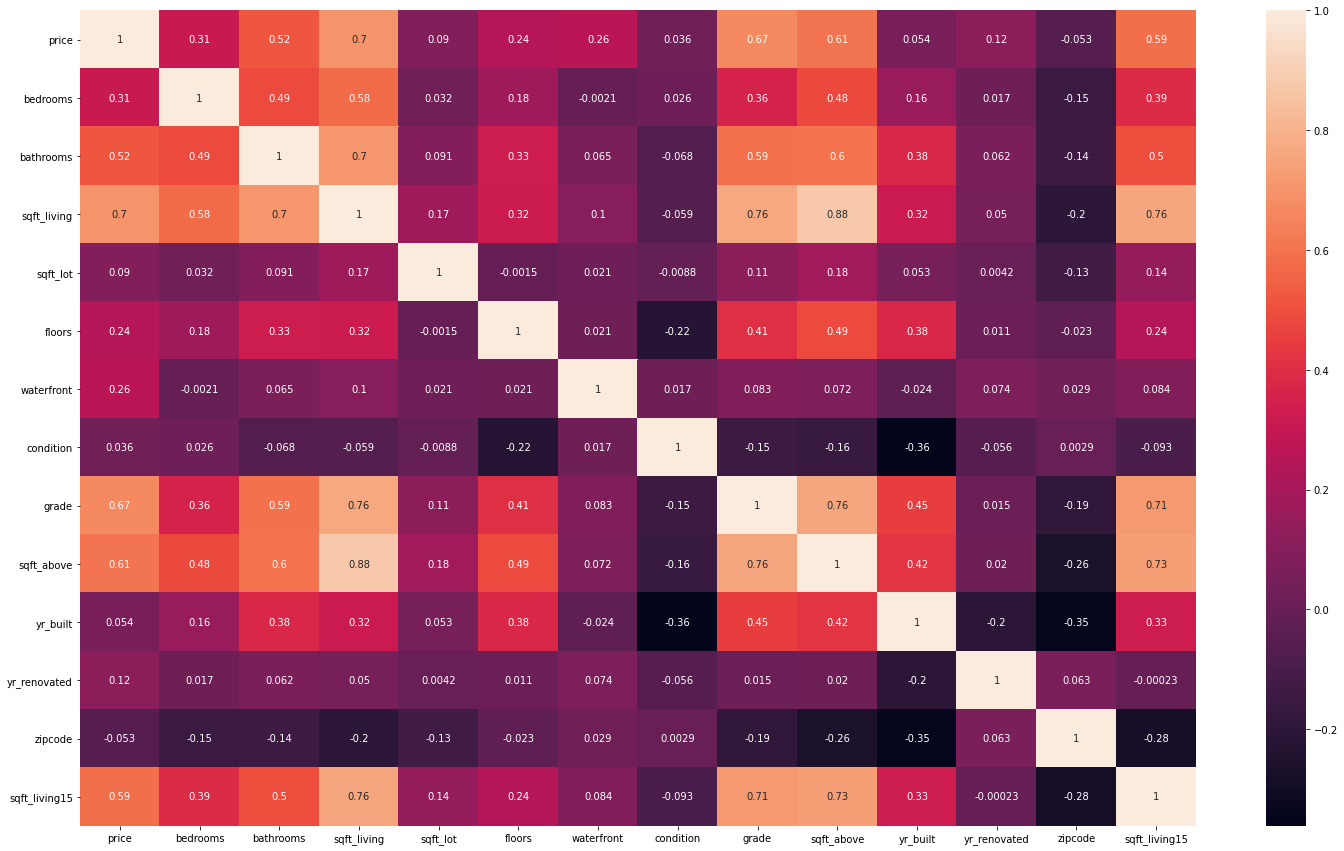

In [14]:
# a better display interdependencies and correlations between the variables
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(houses.corr(), annot=True, ax=ax)

Below, we start with the first plots to depict the spread of our variables.

<ipython-input-15-b8253df39972>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(xlabels)


<AxesSubplot:xlabel='price', ylabel='Count'>

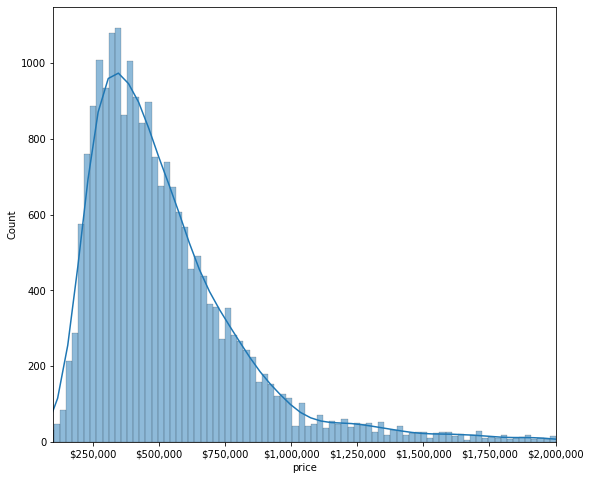

In [15]:
# first plot of the dependant variable price
plt.figure(figsize=(9, 8))
#plt.plot(houses['price'], color='#E66100')
#sns.distplot(houses['price'], color='#E66100', hist_kws={'alpha': 0.4})
chart = sns.histplot(data=houses, x='price', kde=True)
chart.set(xlim = (100000,2000000))

# format the ticks to read the axes better
ticks = chart.axes.get_xticks()
xlabels = ['$' + '{:,.0f}'.format(x) for x in ticks]

chart.set_xticklabels(xlabels)
chart

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

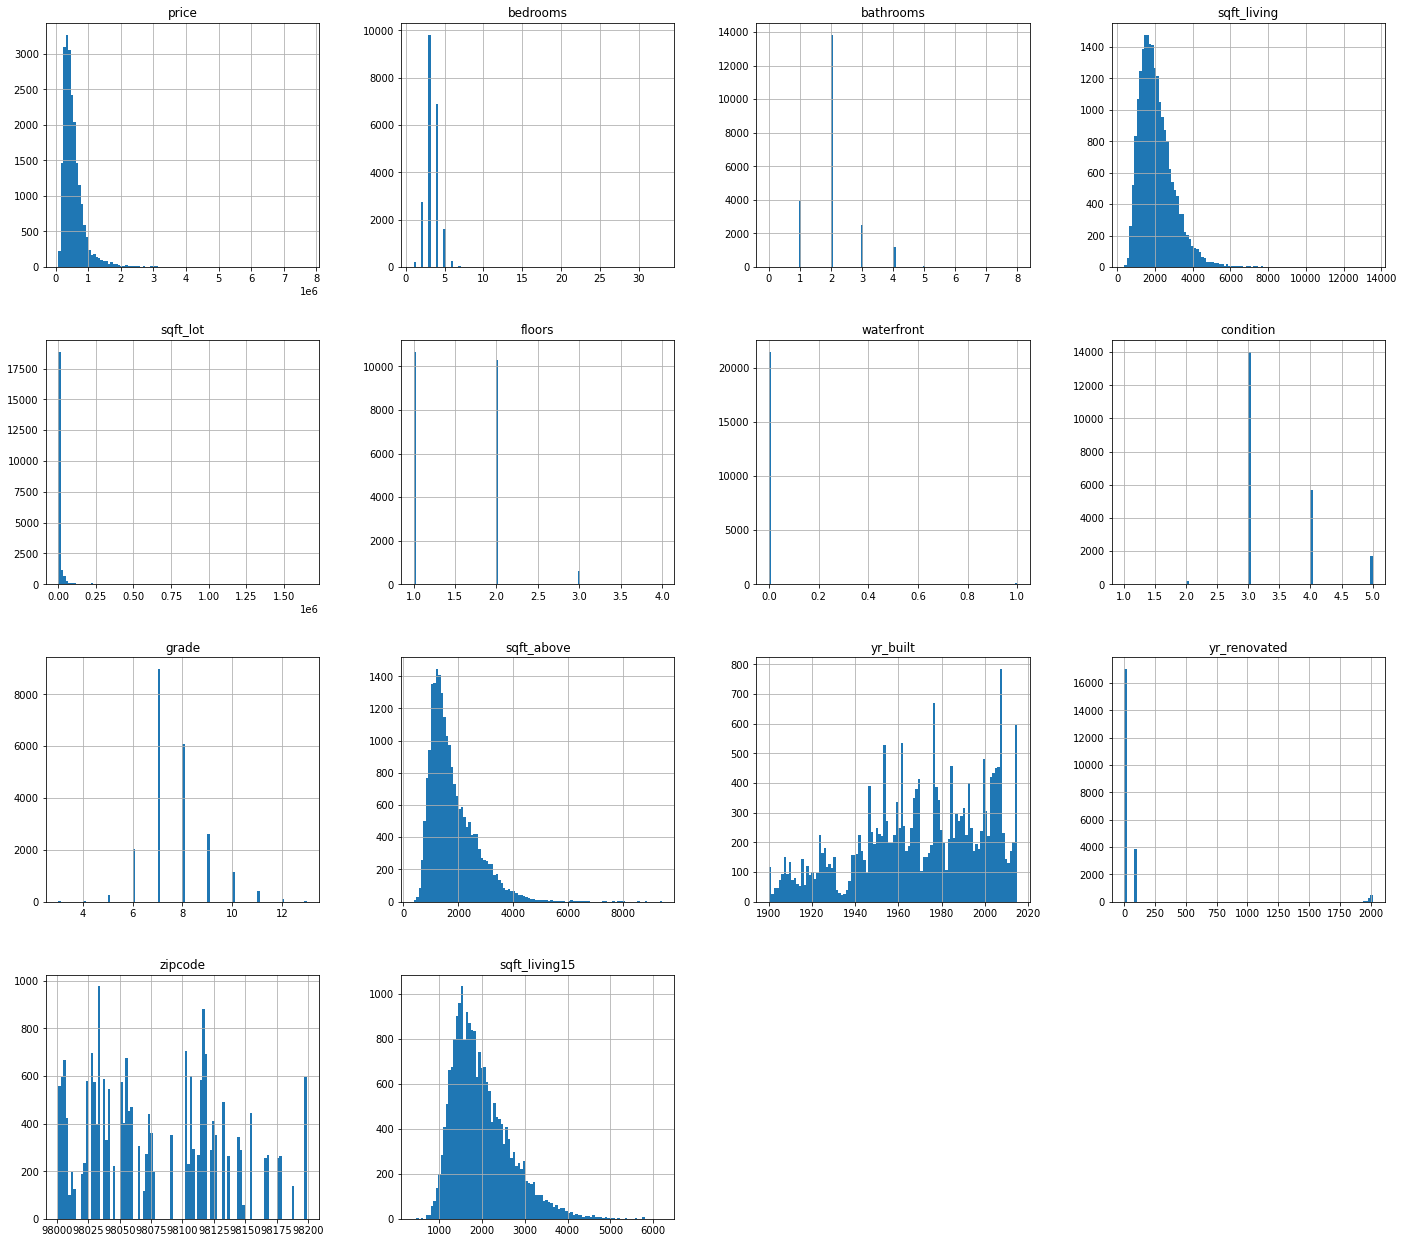

In [16]:
# display the distribution of all variables
houses.hist(bins=100, figsize=(24, 22))

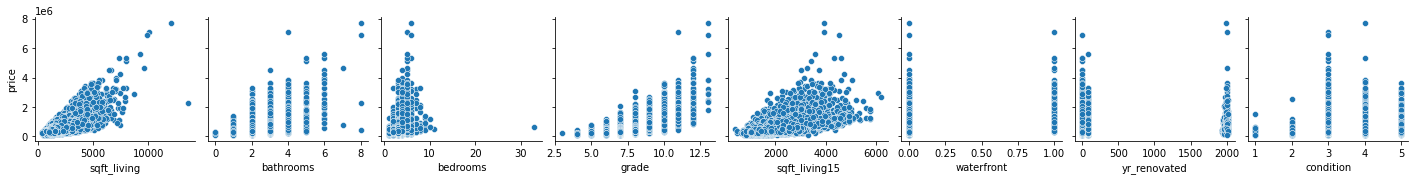

In [17]:
sns.pairplot(houses,x_vars=['sqft_living','bathrooms', 'bedrooms', 'grade', 'sqft_living15', 'waterfront', 'yr_renovated', 'condition'],y_vars=['price']);

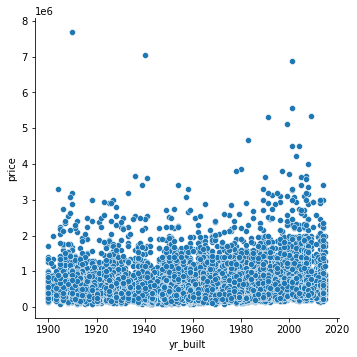

In [91]:
sns.pairplot(houses, x_vars='yr_built', y_vars='price', height=5);

In [18]:
# dropping variables that are not interesting for the regression model
houses.drop(['waterfront', 'yr_renovated', 'yr_built'], axis=1, inplace=True)

# Simple Linear Regression

In [19]:
# import an additional library
import statsmodels.formula.api as smf

## Model 1

In [20]:
# create first regression model with price as the dependant and sqft_living as independent variable
results1 = smf.ols(formula='price ~ sqft_living', data=houses).fit()

In [21]:
# assigned the parameters of the model to variables
intercept1, slope1 = results1.params
intercept1, slope1

(-43988.892194227185, 280.8630143588747)

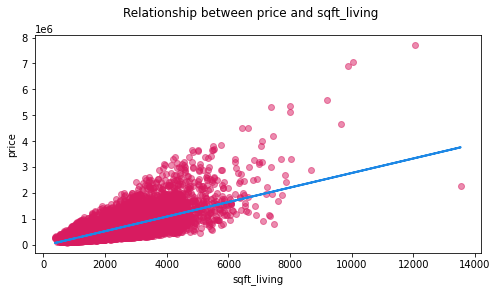

In [22]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = houses.sqft_living
y = houses.price
# add data points
ax.scatter(x, y, alpha=0.5, color="#D81B60")
fig.suptitle('Relationship between price and sqft_living')
# plotting regression line
ax.plot(x, x*slope1 +intercept1, '-', color=COLORS[1], linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("sqft_living");

In [23]:
# summary of the models data
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:28:51   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 2

In [24]:
# create another regression model with price as the dependant and sqft_lot as independent variable
results2 = smf.ols(formula='price ~ sqft_lot', data=houses).fit()
intercept2, slope2 = results2.params
print("Intercept:", intercept2, " ", "Slope:", slope2)

Intercept: 528258.0465134738   Slope: 0.7972846608151648


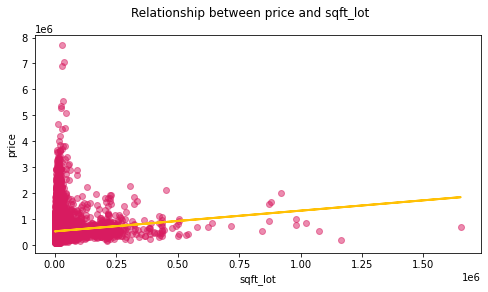

In [25]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(8, 4))
x = houses.sqft_lot
# add data points
ax.scatter(x, y, alpha=0.5, color="#D81B60")
fig.suptitle('Relationship between price and sqft_lot')
# plotting regression line
ax.plot(x, x*slope2 +intercept2, '-', color=COLORS[2], linewidth=2);
ax.set_ylabel("price");
ax.set_xlabel("sqft_lot");

In [26]:
# summary of the models data
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           5.57e-40
Time:                        11:28:52   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 3

In [28]:
# import another library
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go

In [29]:
#get one X variable and our target(y)
X = houses['sqft_living15'].values.reshape(-1,1)
y = houses['price'].values.reshape(-1,1)

#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

[-87516.07639775]
[[316.88866029]]


In [31]:
#predicting the test set result
y_pred = regressor.predict(X_test)
#compare actual output values with predicted values
new_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

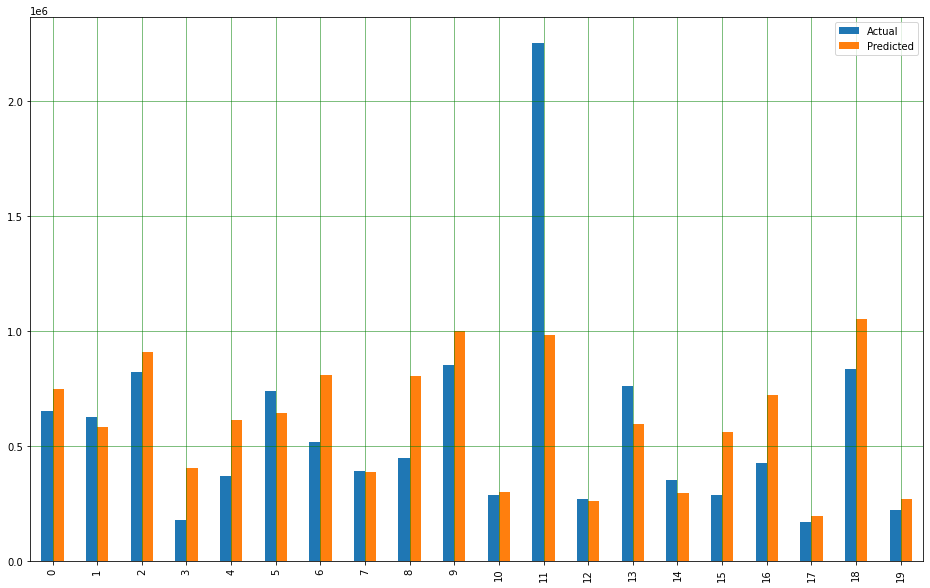

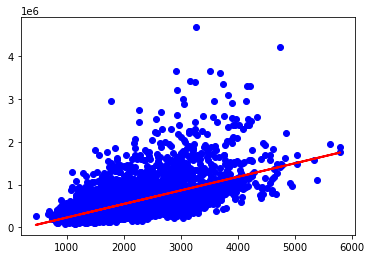

In [32]:
# visualize comparison result as a bar graph
df1 = new_df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#prediction vs test set
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
# evaluate the performance of the algorithm
from sklearn import metrics
#(MAE):mean of the absolute value of the errors
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#(MSE) is the mean of the squared errors
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#(RMSE): square root of the mean of the squared errors
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 183703.77623462494
MSE: 79479884066.222
RMSE: 281921.7694081498


# Multiple Linear Regression

## Model 1

In [34]:
# a different and simpler regression model constructor to contruct a multivariable regression model
model1 = smf.ols(formula='price ~ sqft_living + bathrooms + bedrooms + condition + grade + sqft_lot + sqft_above + sqft_living15 + yr_built + zipcode', data=houses).fit()

In [35]:
# display rsquared
model1.rsquared

0.6201371159350116

In [36]:
from statsmodels.tools.eval_measures import rmse
# fit your model which you have already done

# now generate predictions
ypred = model1.predict(houses)

ypred
# calc rmse
rmse = rmse(houses['price'], ypred)
rmse

226414.82791999084

## Model 2

In [37]:
#training the simple Linear Regression model on the training set
X_1 = houses[['sqft_living', 'bathrooms', 'bedrooms', 'condition', 'grade', 'sqft_lot', 'sqft_above', 'sqft_living15', 'yr_built', 'zipcode']]
y_1 = houses['price']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42, shuffle=True)

# Merge datasets after test split for formula notation
X_train_1 = X_train_1.merge(y_train_1, left_index = True, right_index=True)

In [38]:
# adjusted previous regression model after transforming zipcode to dummies
adj_model1 = smf.ols(formula='price ~ sqft_living + bathrooms + bedrooms + condition + grade + sqft_lot + sqft_above + sqft_living15 + yr_built + C(zipcode)', data=X_train_1).fit()
adj_model1.rsquared

0.7655174961700015

In [39]:
from statsmodels.tools.eval_measures import rmse
# fit your model which you have already done

# now generate predictions
ypred = adj_model1.predict(X_test_1)

ypred
# calc rmse
rmse = rmse(y_test_1, ypred)
rmse

183744.7827801012

In [40]:
#compare actual output values with predicted values
new2_df = pd.DataFrame({'Actual': y_test_1, 'Predicted': ypred})
df1 = new2_df.head(10)
df1.head()

,Actual,Predicted
3686,132500.00,116443.82
10247,415000.00,456854.59
4037,494000.00,298493.41
3437,355000.00,270259.36
19291,606000.00,507676.88


## Polynomial Regression

In [71]:
# PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [73]:
houses.drop(['price'],axis = 1)
y = houses['price']

#training the simple Linear Regression model on the training set
poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X_1)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size = 0.25, random_state = 42)

In [58]:
#adj_model2 = smf.ols(formula='price ~ sqft_living + bathrooms + bedrooms + condition + grade + sqft_lot + sqft_above + sqft_living15 + yr_built + C(zipcode)', data=X_train).fit()

In [74]:
#fit and predict model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
poly_lr = LinearRegression().fit(X_train,y_train)
y_pred = poly_lr.predict(X_test)

In [75]:
#checking accuracy of Polynomial Regression Model
print('Polynomial Regression Model:')
print("Train Score {:.2f}".format(poly_lr.score(X_train,y_train)))
print("Test Score {:.2f}".format(poly_lr.score(X_test, y_test)))

Polynomial Regression Model:
Train Score 0.71
Test Score 0.68


In [76]:
#evaluate the model - Coefficient and constant
print(poly_lr.intercept_)
print(poly_lr.coef_)

-49410398471.0618
[-4.08969922e+02 -6.74983499e+03 -5.81872640e+06  1.01523178e+07
 -3.26286767e+06 -1.91287807e+07  2.62278461e+02  4.06942664e+04
  5.57734362e+04 -1.02899477e+06  1.02779529e+06 -2.53319394e-02
  4.23752488e+01 -4.73109392e+01  5.45084968e+00  7.08593871e+01
 -6.28825625e-04  3.31168678e-02  3.55266671e-02 -1.21958388e-01
  6.74280043e-02 -1.31196994e+04  5.02209519e+03  1.45697787e+02
  1.59050838e+04 -1.57397684e-01 -2.79122499e+00 -3.31310727e+01
  3.61344984e+02  5.13557201e+01  5.72300916e+03 -1.31878430e+03
 -8.50758561e+03  1.25007193e-01  3.07920506e+01  1.18692751e+01
 -3.63018501e+02 -9.59922824e+01  1.91166231e+03 -3.80855636e+03
 -2.54826986e-02  1.12291786e+01  3.91712059e+01 -2.50953169e+02
  3.76943491e+01  5.56482506e+03  3.54371616e-03 -2.59653784e+01
 -1.42262818e+01 -4.13872098e+02  2.02900175e+02  7.78120011e-07
  1.13011338e-05 -1.12025067e-04  2.23378849e-02 -3.11371218e-03
 -1.36256397e-02 -3.32841703e-02  2.43222584e-01 -4.18845337e-01
  1.842

In [78]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2 = df.head()
df2

,Actual,Predicted
3686,132500.00,226745.28
10247,415000.00,333181.74
4037,494000.00,359835.82
3437,355000.00,355227.51
19291,606000.00,409687.43


In [79]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 129513.31393901966
MSE: 44546539756.47045
RMSE: 211060.51207288977
